In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
#depth = cv2.imread('data/depth1.png') #, cv2.IMREAD_ANYDEPTH
depth = cv2.cvtColor(cv2.imread('data/depth1.png'), cv2.COLOR_BGR2RGB)

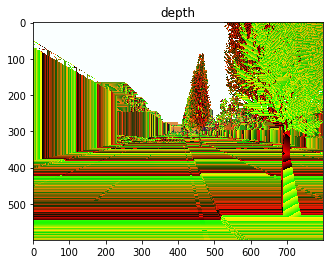

In [4]:
plt.imshow(depth)
plt.title('depth')
plt.show()

In [5]:
print(depth.shape, depth.dtype)

(600, 800, 3) uint8


In [6]:
def rgb2depth(cell):
    normalized = (cell[0] + cell[1] * 256 + cell[2] * 256 * 256) / (256 * 256 * 256 - 1)
    in_meters = 1000 * normalized
    return in_meters

In [7]:
print(depth[599,799])
rgb2depth(depth[599,799])

[175 196   0]


3.0011536479683905

In [8]:
gray = np.dot(depth, [0.2989, 0.5870, 0.1140])

In [9]:
print(gray.shape, gray.dtype)

(600, 800) float64


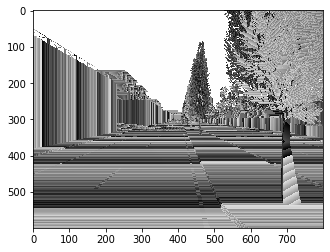

In [10]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [11]:
depth16 = np.zeros((600,800), np.float16)
np.full_like(depth16, np.nan, dtype=np.float16)
for i, row in enumerate(depth):
    for j, pix in enumerate(row):
        depth16[i,j] = rgb2depth(depth[i,j])

In [12]:
depth16[599,799]

3.002